## Funcional

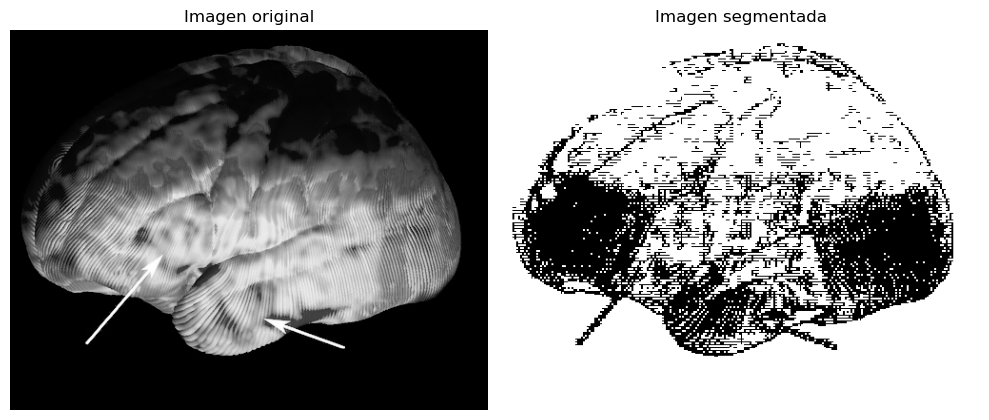

In [1]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_homogeneous(region, threshold):
    min_val, max_val = np.min(region), np.max(region)
    return (max_val - min_val) <= threshold

def split_and_merge(image, threshold):
    def recursive_split(region):
        rows, cols = region.shape
        if rows <= 1 or cols <= 1:
            return np.zeros_like(region, dtype=np.uint8)
        if is_homogeneous(region, threshold):
            return np.ones_like(region, dtype=np.uint8)
        mid_row, mid_col = rows // 2, cols // 2
        top_left = region[:mid_row, :mid_col]
        top_right = region[:mid_row, mid_col:]
        bottom_left = region[mid_row:, :mid_col]
        bottom_right = region[mid_row:, mid_col:]
        segmented_quadrants = np.zeros_like(region, dtype=np.uint8)
        segmented_quadrants[:mid_row, :mid_col] = recursive_split(top_left)
        segmented_quadrants[:mid_row, mid_col:] = recursive_split(top_right)
        segmented_quadrants[mid_row:, :mid_col] = recursive_split(bottom_left)
        segmented_quadrants[mid_row:, mid_col:] = recursive_split(bottom_right)
        return segmented_quadrants

    def merge_regions(segmented):
        # Placeholder function for merging adjacent regions if needed
        return segmented

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    segmented_image = recursive_split(image)
    segmented_image = merge_regions(segmented_image)
    return segmented_image

def main():
    file_path = "assets/adhd_brain.jpeg"
    url = "https://psychiatryonline.org/cms/10.1176/pn.39.1.0026/asset/images/sowelladhd_media1.jpeg"
    try:
        response = requests.get(url)
        response.raise_for_status()
        image = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    except:
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error loading image.")
        return
    threshold = 20  # Adjust this value as needed
    result = split_and_merge(image, threshold)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Imagen original')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Imagen segmentada')
    plt.imshow(result * 255, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()